<h3>Mapping Short-term Ocean Shoreline Change in North Carolina - 2004 to 2009 Nags Head Prototype Site</h3>

<h4>Table of Contents</h4>

- Shoreline/Transect Crossings
- Processing Shoreline Erosion Displacements and Rates
- Spare Parts, Sidebars, and Bits...

**The Data:**

- The North Carolina Department of Environmental Quality: https://deq.nc.gov/about/divisions/coastal-management/coastal-management-data/spatial-data-maps provided shorelines for 1933-1952, 1940-1962, 1998, 2004, and 2009. Shore-normal transects were also acquired from the DEQ DCM.


- Aerial orthoimagery used in the shoreline overlay graphics obtained from NC One Map: http://data.nconemap.com/geoportal/catalog/raster/download.page


- Shuttle Radar Topography Mission (SRTM) data was obtained from: http://earthexplorer.usgs.gov/. Resolution was/is 1 arc-second. 


- The U.S. Geological Survey: https://pubs.usgs.gov/of/2005/1326/gis-data.html as part of The National Assessment on Shoreline Change: A GIS Compilation of Vector Shorelines and Associated Shoreline Change Data for the U.S. Southeast Atlantic Coast (Miller, Morton, Sallenger, USGS Open File Report 2005-1326). This group provided shorelines captured between 1849 and 1997, along with shoreline-normal transects (interval=50m) and baseline (offshore).


- LiDAR data was obtained from: https://coast.noaa.gov/dataregistry/search/collection/info/coastallidar or, if you want the interactive viewer: https://coast.noaa.gov/dataviewer/#/lidar/search/ These data will be used to generate/derive more contemporary (post 1997) study site shorelines as a test case for he Town of Nags Head, NC. 


- Long-Term Ocean shoreline erosion data is from: 
The North Carolina Department of Environmental Quality: https://deq.nc.gov/about/divisions/coastal-management/coastal-management-data/spatial-data-maps. The Department last updated ocean shoreline rates in 2013, using a 2011 shoreline.
Erosion rates for 2013 are computed using the Endpoint Rate Method. 


NOTES:
1. transects from the NC DEQ/DCM report erosion rates as follows:
    EPR_M = End Point Rate in meters,
    EPR_2009_S = End Point Rate computed in 2009 in U.S. Survey feet, smoothed,
    EPR_2009_R = End Point Rate computed in 2009 in U.S. Survey feet, raw
    
    
2. LiDAR shorelines are only used in a prototype case for the Town of Nags Head. All subsequent analyses, including those which contribute to and all final report(s), use shorelines supplied by the NC DEQ/DCM.

<h4>Prototype Site Geography:</h4>

Site 1:  The Town of Nags Head, NC. From the SE end to just north of Jennette's Pier:

![nags_nead](../misc/NH_Prototype/Nags_Head_Study_Area.png)

The Nags Head study area. LiDAR DEM data from 2004, 2005, 2009, 2012, and 2014 were retrieved from the source listing for LiDAR, in the prior cell. EPSG: 3632 (NAD83(NSRS2007)/North Carolina (ftUS)

<h4>Processing Part 1:  Extracting MHW shorelines from the LiDAR-derived DEMs</h4> 

**NOTE: These shorelines and the Part 1 Processing, APPLY ONLY to the Nags Head prototype. **

- Create a mask area that restricts processing to area along subaerial beach. Digitize mask polygon in QGIS using the 2004 and 2014 DEMs for guidance. The interior boundary follows the approximate centerline of State Route 1243. 

Working in QGIS:
- create a temporary raster mask using the GRASS Toolbox Command r.mask.vect using the current DEM. This will, in essence, clip out a portion of the underlying DEM creating an autonomous DEM subset called MASK.


- Generate 100000 random points, confining the generation area to the geographic extents of the MASK, using r.random from the GRASS Toolbox. The DEM values (elevations above or below the NAVD88 shoreline) are automataically conflated tothe random points upon creation.


- Select from the random point set that subset which meets the critera: 1.90 <= z <= 2.10 (in QGIS, Select Features by Expression). Save these points to a new (and permanent) shape file (naming convention: <loc>_SLxy, example: NH_SLxy for the Town of Nags Head (NH), North Carolina).


NOTE: the selection of points between 1.9 and 2.1 feet above the 0 foot shoreline is a result of the offset between the NAVD88 0 feet contour and MHW--which is the datum used in this analysis. The difference along this section of the Northeastern North Carolina coastline is about 0.6 meters or 1.97 feet. The span from 1.9 to 2.1 feet provides the desired translation of the shoreline from NAVD88 to MHW.


- Using QGIS's digitizing tools edit to remove 'extraneous' points in the resulting point subset shape file. Note that it's not unusual for there to be points that meet the selection criteria that sit back off the beach. 


- Again, using QGIS's digitizing tools, this time create a new line shape file and connect the shoreline 'dots' to create a vector shoreline for analysis. Save and save often. 


- Clean up: remove the MASK and temporary random vector layers

<h4>Processing Part 2:  Prepare the transect layer for the analytic work to come</h4> 

**NOTE you need to do this Processing Part ONLY ONCE--before doing any shoreline analysis. The transects data that emerge from this Processing Step will be used without further alteration for the duration of the analyses (probably)**

In QGIS:
- To the transects layer add the following fields:
    - SIMPLE_ID type=Integer Length=7
    - XROOT type=Floating Point(Decimal Number Real)  Length=12 Precision=2
    - YROOT type=Floating Point(Decimal Number Real)  Length=12 Precision=2
  
  
- Conflate the contents of the NCDCM_ID field to the new SIMPLE_ID field  (the NCDCM_ID field is floating point, however, we would like to have a nice, convenient field that contains a unique ID for each of the 9802 transects in the set. Hence, the SIMPLE_ID field!)

- Compute and populate the XROOT and YROOT fields as:  XROOT=\$x_at(0);  YROOT=\$y_at(0)

- Save everything


- Export transects layer to .csv file

Be Cool!

<h4>Processing Part 3:  Generate the shoreline/transect crossings (intersections) for each shoreline vintage</h4> 

This workflow intersects each shoreline vintage with the transects. The result is a set of points marking the intersection location of the shoreline vector with each transect that it (the shoreline) crosses. The locations of these intersections (points) will be used in the next processing step to compute the shoreline displacement and displacement rate.

In QGIS:
1. create the site transects as a subset of the statewide transects layer. 
    - select the subset of transects using the Select By tool
    - Save as... the subset transects



2. Vector --> Analysis Tools --> Line Intersections
    - input: shoreline vector (line)
    - intersect layer: transects
    - input unique id: year
    - intersect unqiue id: ID
    - export the intersection results to an external ASCII comma separated text file
    
Repeat Step 2 for each of the shorelines in the analysis. 

<h4>Processing Part 4:  Processing the shoreline positions and displacements, and plotting the results</h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# import each of the 3 transect/shoreline intersections files into individual (for the moment) pandas dataframes:

# NOTE: NHPT=Nags Head Prototype Site
fpath='/Volumes/Beaker/projects/NCShorelineSurvey/data/DCM_Focus_Sites/NagsHead_Prototype/'
f_1998='NH_Prototype_Interc_1998.csv'
f_2004='NH_Prototype_Interc_2004.csv'
f_2009='NH_Prototype_Interc_2009.csv'


# intersect (Interc) file field contents: x,y,year,transect
cols=['x_98','y_98','year', 'transect']
df_1998 = pd.read_csv(fpath+f_1998, header=0, names=cols )

cols=['x_04','y_04','year', 'transect']
df_2004 = pd.read_csv(fpath+f_2004, header=0, names=cols )

cols=['x_09','y_09','year', 'transect']
df_2009 = pd.read_csv(fpath+f_2009, header=0, names=cols )

In [5]:
### import the transects themselves to retrieve the EPR values:
fpath='/Volumes/Beaker/projects/NCShorelineSurvey/data/DCM_Focus_Sites/NagsHead_Prototype/'
f_transects='NH_Prototype_Transects.csv'

df_transects=pd.read_csv(fpath+f_transects)

df_transects.describe()

,OBJECTID,NCDCM_ID,DOLAN_ID,BaselineID,TransOrder,COMMENTS,Shape_Leng,T_SUBREG,EPR_M,NSM_M,...,EPR_2009_S,BLOCK,COMMENTS_1,BCH_ANGLE,BLOCK_PLCY,GRAPH_EPRS,GRAPH_EPRR,SIMPLE_ID,XROOT,YROOT
count,152.000000,152.000000,152.000000,152.0,152.000000,0.0,152.000000,152.0,152.000000,152.000000,...,152.000000,152.000000,0.0,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000
mean,7890.440789,8588.500000,39.167697,23.0,4060.500000,NaN,1837.501520,4.0,-1.290263,-76.895592,...,-4.231893,4.016447,NaN,64.660395,4.016447,4.230921,4.234211,8588.500000,3.015981e+06,793563.276053
std,531.087697,44.022721,0.656130,0.0,44.022721,NaN,3.735455,0.0,0.458458,27.346517,...,1.471321,1.426358,NaN,0.926251,1.426358,1.471956,1.505491,44.022721,3.087052e+03,6526.400048
min,7273.000000,8513.000000,38.160000,23.0,3985.000000,NaN,1833.539341,4.0,-2.180000,-130.240000,...,-7.027130,2.000000,NaN,63.840000,2.000000,1.800000,1.800000,8513.000000,3.010686e+06,782258.240000
25%,7537.000000,8550.750000,38.537500,23.0,4022.750000,NaN,1834.498080,4.0,-1.762500,-104.900000,...,-5.659725,2.500000,NaN,63.910000,2.500000,2.900000,2.900000,8550.750000,3.013286e+06,787980.775000
50%,7698.500000,8588.500000,39.225000,23.0,4060.500000,NaN,1836.749126,4.0,-1.200000,-71.495000,...,-3.827190,3.500000,NaN,64.030000,3.500000,3.850000,3.900000,8588.500000,3.016005e+06,793627.255000
75%,8048.250000,8626.250000,39.602500,23.0,4098.250000,NaN,1839.351336,4.0,-0.887500,-52.712500,...,-2.908028,5.000000,NaN,65.842500,5.000000,5.625000,5.800000,8626.250000,3.018717e+06,799191.605000
max,8832.000000,8664.000000,40.300000,23.0,4136.000000,NaN,1853.624369,4.0,-0.540000,-32.040000,...,-1.847010,7.500000,NaN,65.880000,7.500000,7.000000,7.200000,8664.000000,3.021089e+06,804685.940000


In [6]:
### join (inner join) the shorelines that will be compared (1998-2004; 2004-2009; 1998-2009):

df_9804 = pd.merge(df_1998, df_2004, on='transect', how='inner').sort_values('transect')
df_0409 = pd.merge(df_2004, df_2009, on='transect', how='inner').sort_values('transect')
df_9809 = pd.merge(df_1998, df_2009, on='transect', how='inner').sort_values('transect')

### go ahead and sort the transects too, for consistency (if for no other reason...it does help with some plots):
df_transects = df_transects.sort_values('SIMPLE_ID')

In [7]:
### compute the shoreline displacement [absolute value] and rate [absolute value] for each comparison pair:

# for displacement:
df_9804['displ_abs'] = ((df_9804.x_04-df_9804.x_98)**2 + (df_9804.y_04-df_9804.y_98)**2)**0.5
df_0409['displ_abs'] = (((df_0409.x_09-df_0409.x_04)**2 + (df_0409.y_09-df_0409.y_04)**2)**0.5)
df_9809['displ_abs'] = (((df_9809.x_09-df_9809.x_98)**2 + (df_9809.y_09-df_9809.y_98)**2)**0.5)

# for rate:
df_9804['epr_abs'] = ( ((df_9804.x_04-df_9804.x_98)**2 + (df_9804.y_04-df_9804.y_98)**2)**0.5 )/ 6.0
df_0409['epr_abs'] = ( (((df_0409.x_09-df_0409.x_04)**2 + (df_0409.y_09-df_0409.y_04)**2)**0.5) ) / 5.0
df_9809['epr_abs'] = ( (((df_9809.x_09-df_9809.x_98)**2 + (df_9809.y_09-df_9809.y_98)**2)**0.5) ) / 11.0

In [8]:
### function sets the sign for the shoreline change deltas (negative signed if erosion, positive signed if accretion)
# Since the delta (delta_abs) is computed using Euclidean geometry (square root of the sum of the squares) we end
# up with only shoreline displacement magnitude. To recover direction we have to revisit the original differences
# between the shoreline transection intersections.

# NOTE! NOTE! NOTE!  This script assumes an offshore baseline with transect strikes from a root or STARTX,STARTY 
# offshore to onshore. If the baseline is landward with transects striking to seaward, you must reverse the 
# inqeuality (<), otherwise...ouch!

def DetectChangeSign(x1, x2, y1, y2, displ, trans):
    # get the start point coordinates for the transect (point rooted at baseline)
    xStart = df_transects[df_transects['SIMPLE_ID'] == trans].XROOT.item()   
    yStart = df_transects[df_transects['SIMPLE_ID'] == trans].YROOT.item()

    # del1, x1,y1 refers to the older of the two shorelines being compared with the baseline
    # del2, x2,y2 refers to the more recent of the two shorelines being compared with the baseline
    del1=((xStart-x1)**2 + (yStart-y1)**2)**0.5
    del2=((xStart-x2)**2 + (yStart-y2)**2)**0.5
    
    # if older shoreline is closer to the baseline than the more recent shoreline, then the older shoreline is
    # seaward the more recent and so the shoreline at this transect intersection has experience erosion over the
    # time period t (so the displacement and epr **are** negated). If, on the otherhand, the older shoreline is further from the seaward located baseline than
    # the more recent then the older shoreline landward of the more recent, and so net accretion has occurred 
    # at this transect location (so the dislacement and epr ***are not*** negated).
    if(del1 - del2) < 0:  #yes, then erosion (-)
        return(displ * -1.0)
    else:
        return(displ)



# to set the signed displacement:
df_9804['displ']=df_9804.apply(lambda x: DetectChangeSign(x['x_98'], x['x_04'], x['y_98'], x['y_04'], x['displ_abs'], x['transect'] ), axis=1 )
df_0409['displ']=df_0409.apply(lambda x: DetectChangeSign(x['x_04'], x['x_09'], x['y_04'], x['y_09'], x['displ_abs'], x['transect'] ), axis=1 )
df_9809['displ']=df_9809.apply(lambda x: DetectChangeSign(x['x_98'], x['x_09'], x['y_98'], x['y_09'], x['displ_abs'], x['transect'] ), axis=1 )

# to set the signed end point erosion rate:
df_9804['epr']=df_9804.apply(lambda x: DetectChangeSign(x['x_98'], x['x_04'], x['y_98'], x['y_04'], x['epr_abs'], x['transect'] ), axis=1 )
df_0409['epr']=df_0409.apply(lambda x: DetectChangeSign(x['x_04'], x['x_09'], x['y_04'], x['y_09'], x['epr_abs'], x['transect'] ), axis=1 )
df_9809['epr']=df_9809.apply(lambda x: DetectChangeSign(x['x_98'], x['x_09'], x['y_98'], x['y_09'], x['epr_abs'], x['transect'] ), axis=1 )

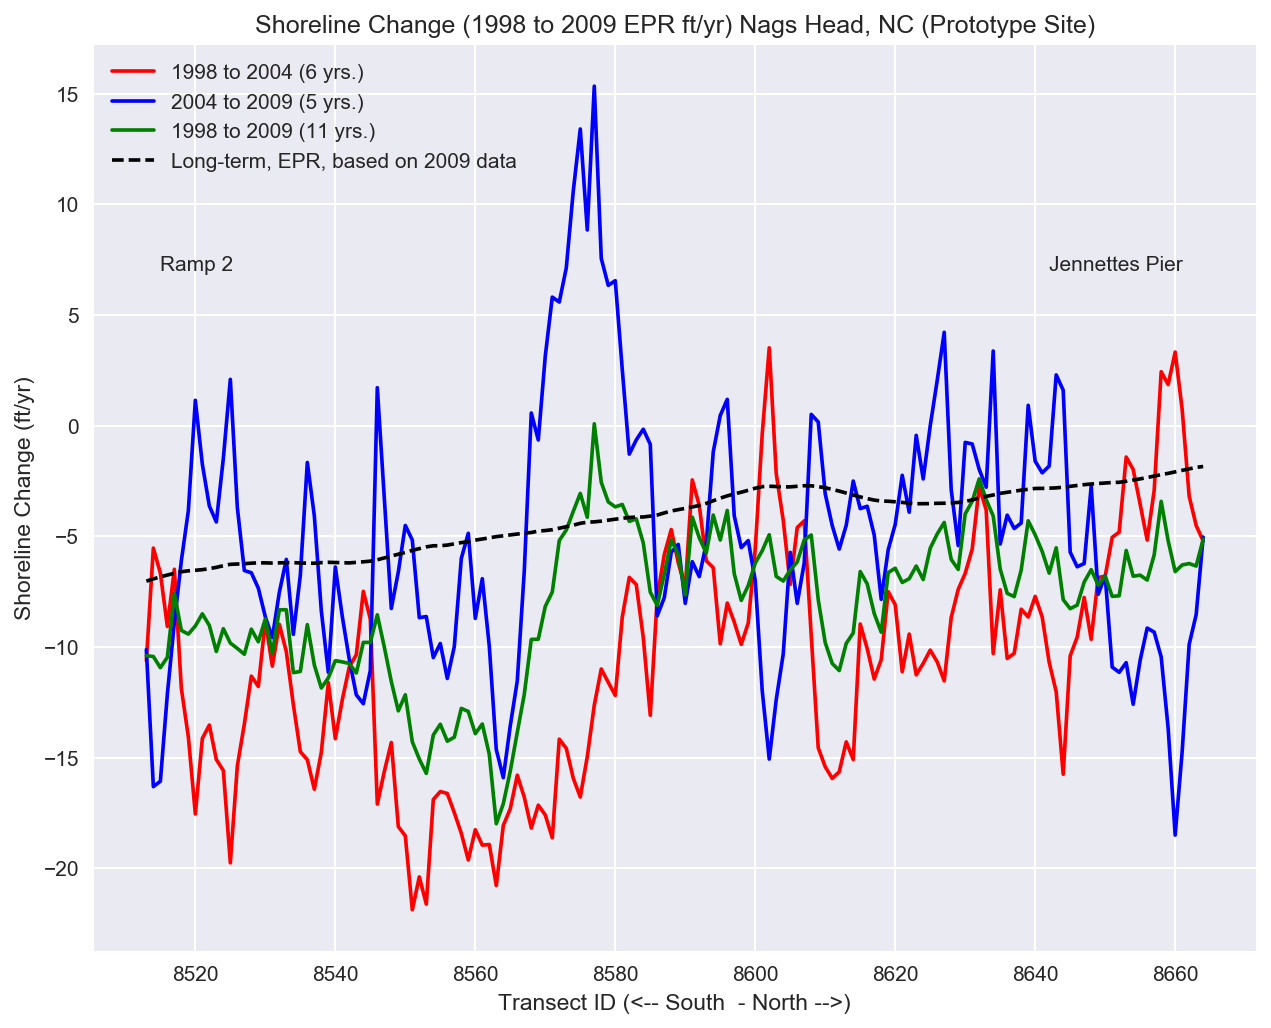

In [9]:
# plot the End Point Rates for the shoreline pairs:

plt.figure(num=None, figsize=(10, 8), dpi=150, facecolor='w', edgecolor='k')

plt.plot(df_9804.transect, df_9804.epr, c='red', label='1998 to 2004 (6 yrs.)')
plt.plot(df_0409.transect, df_0409.epr, c='blue', label='2004 to 2009 (5 yrs.)')
plt.plot(df_9809.transect, df_9809.epr, c='green', label='1998 to 2009 (11 yrs.)')

plt.plot(df_transects.SIMPLE_ID, df_transects.EPR_2009_S, linestyle='dashed', c='k', label='Long-term, EPR, based on 2009 data')
plt.xlabel('Transect ID (<-- South  - North -->)')
plt.ylabel('Shoreline Change (ft/yr)')
plt.title('Shoreline Change (1998 to 2009 EPR ft/yr) Nags Head, NC (Prototype Site)')
plt.legend(loc='upper left')

plt.text(8515, 7, 'Ramp 2')
plt.text(8642, 7, 'Jennettes Pier')
#plt.savefig('/Volumes/Beaker/projects/nc_coastal_erosion/misc/NH_PrototypeSite_EPR_980409.pdf')

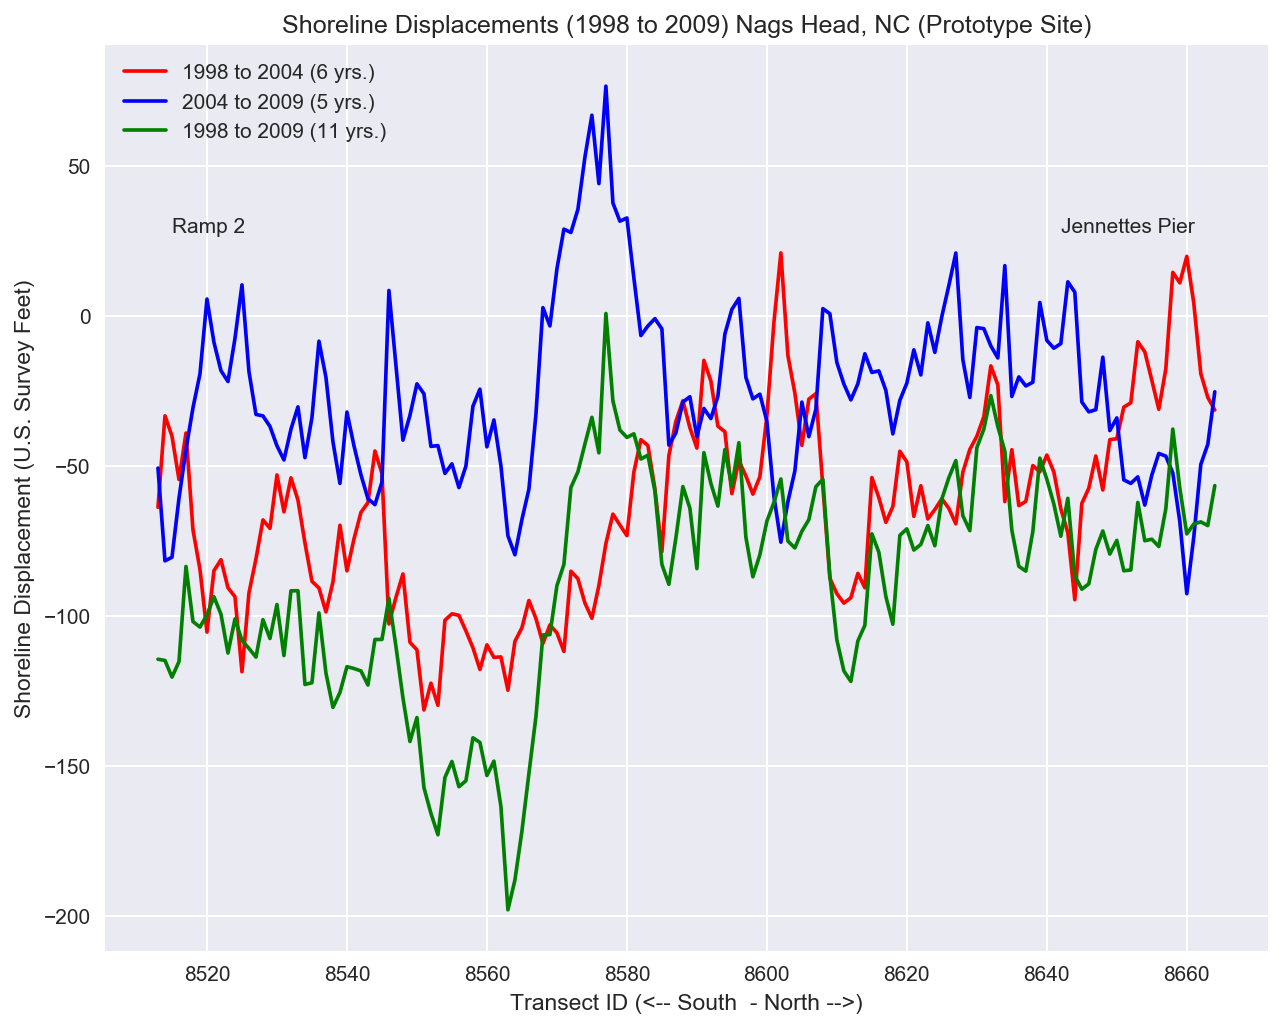

In [55]:
# plot the net displacements for the shoreline pairs:

plt.figure(num=None, figsize=(10, 8), dpi=150, facecolor='w', edgecolor='k')

plt.plot(df_9804.transect, df_9804.displ, c='red', label='1998 to 2004 (6 yrs.)')
plt.plot(df_0409.transect, df_0409.displ, c='blue', label='2004 to 2009 (5 yrs.)')
plt.plot(df_9809.transect, df_9809.displ, c='green', label='1998 to 2009 (11 yrs.)')

plt.xlabel('Transect ID (<-- South  - North -->)')
plt.ylabel('Shoreline Displacement (U.S. Survey Feet)')
plt.title('Shoreline Displacements (1998 to 2009) Nags Head, NC (Prototype Site)')
plt.legend(loc='upper left')

plt.text(8515, 28, 'Ramp 2')
plt.text(8642, 28, 'Jennettes Pier')

#plt.savefig('/Volumes/Beaker/projects/nc_coastal_erosion/misc/NH_PrototypeSite_displace_980409.pdf')

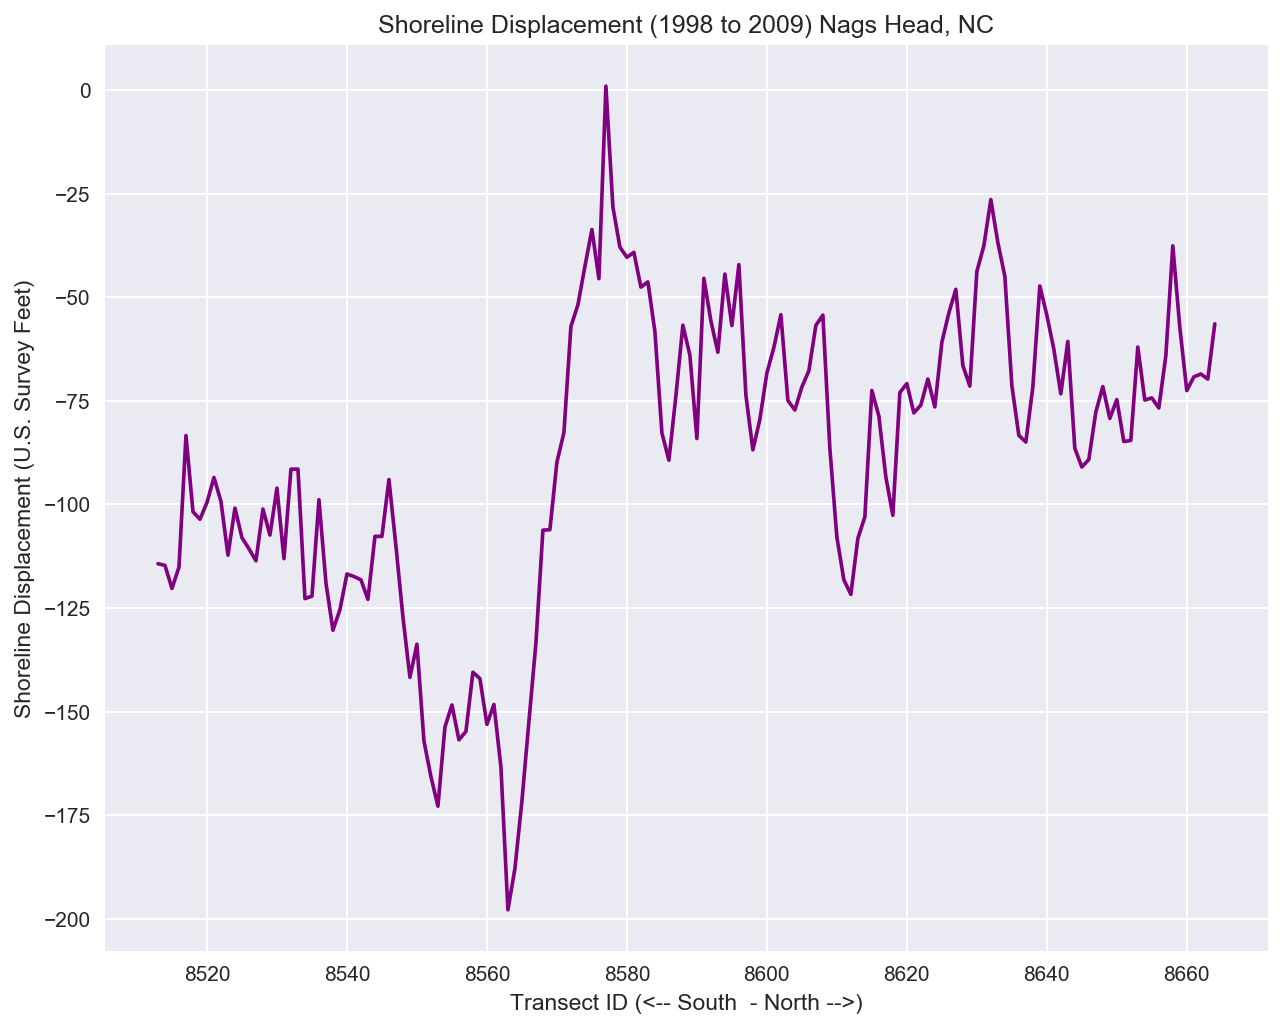

In [54]:
# plot the net decadal displacement alone for the 2004 - 2014 shoreline pair:

plt.figure(num=None, figsize=(10, 8), dpi=150, facecolor='w', edgecolor='k')
plt.plot(df_9809.transect, df_9809.displ, c='purple', linestyle='solid', label='1998 to 2009')

plt.xlabel('Transect ID (<-- South  - North -->)')
plt.ylabel('Shoreline Displacement (U.S. Survey Feet)')
plt.title('Shoreline Displacement (1998 to 2009) Nags Head, NC')

#plt.savefig('/Volumes/Beaker/projects/nc_coastal_erosion/misc/NH_PrototypeSite_displace_9809.pdf')

<h3>Spare Parts, Sidebars, and Bits...</h3>

Mean EPR: -1.5617051214  Median EPR: -1.3124
EPR Standard Deviation: 5.08233032745


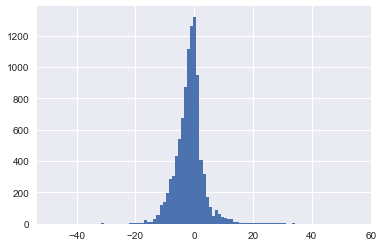

In [67]:
## SIDEBAR: generate a histogram and a few simple statistics for the end point erosion rates reported from the 
# 2009 data:

fpath='/Volumes/Beaker/projects/nc_coastal_erosion/data/DCM_transects_oceanfront_50meter/'
f='transects_oceanfront_50meter.csv'  #'NH_Prototype_Transects.csv'

df_ = pd.read_csv(fpath+f)

t=9802  #152
b=int(t**0.5)    # nothing fancy to get the bin count, just the simple square root rule...
df_['EPR_2009_R'].hist(bins=b) 

# plot the mean, median, and standard deviation:

print('Mean EPR:', df_['EPR_2009_R'].mean(), ' Median EPR:', df_['EPR_2009_R'].median())
print('EPR Standard Deviation:', df_['EPR_2009_R'].std())

### Mean EPR: -1.5617051214  Median EPR: -1.3124
### EPR Standard Deviation: 5.08233032745

#plt.savefig('/Volumes/Beaker/projects/nc_coastal_erosion/misc/NC_distro.pdf')
#plt.savefig('/Volumes/Beaker/projects/nc_coastal_erosion/misc/NH_PrototypeSite_distro.pdf')

In [57]:
### SIDEBAR: check for a field in the dataframe that can stand in as a unique transect ID:

#fpath='/Volumes/Beaker/projects/nc_coastal_erosion/data/DCM_transects_oceanfront_50meter/'
fpath='/Volumes/Beaker/projects/nc_coastal_erosion/data/DCM_Focus_Sites/NagsHead_Prototype/'
f='NH_Prototype_Transects.csv'

df_ = pd.read_csv(fpath+f)
#df_.duplicated('NCDCM_ID')

names = df_transects.SIMPLE_ID.value_counts()
names[names > 1]



Series([], Name: SIMPLE_ID, dtype: int64)